Goal: exploring feature reduction on a Face Recognition Dataset

Face classification dataset: http://vis-www.cs.umass.edu/lfw/

- Images of well-known people
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [2]:
# From anaconda: install pillow
from sklearn.datasets import fetch_lfw_people

lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
n_samples, height, width = lfw.images.shape
print('number of images', n_samples)
print('height (pixels)', height)
print('width (pixels)', width)

number of images 1288
height (pixels) 50
width (pixels) 37


In [4]:
print('labels', lfw.target_names)

print('y', lfw.target.shape, lfw.target)

print('X', lfw.data.shape, lfw.data)

labels ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
y (1288,) [5 6 3 ... 5 3 5]
X (1288, 1850) [[254.       254.       251.66667  ...  87.333336  88.666664  86.666664]
 [ 39.666668  50.333332  47.       ... 117.666664 115.       133.66667 ]
 [ 89.333336 104.       126.       ... 175.33333  183.33333  183.      ]
 ...
 [ 86.        80.333336  74.666664 ...  44.        49.666668  44.666668]
 [ 50.333332  65.666664  88.       ... 197.       179.33333  166.33333 ]
 [ 30.        27.        32.666668 ...  35.        35.333332  61.      ]]


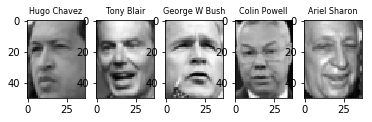

In [5]:
%matplotlib inline
# plot images to see dataset

import matplotlib.pyplot as plt
num = 5

images = lfw.data[:5] # first 5 images (X)
targets = lfw.target[:5] # first 5 targets (y)

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

# for i in range(num):
#   axes[i].imshow(images[i])
#

for image, target, ax in zip(images, targets, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)
    ax.set_title(lfw.target_names[target], size=8)

plt.show()

In [6]:
# PCA to map X to Z for training

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = lfw.data
y = lfw.target

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit using training set
pca = PCA(n_components=150)
pca.fit(X_train) # compute eigenvectors / eigenvalues

eigenfaces = pca.components_
eigenfaces
# transform train and test


array([[-0.00685209, -0.00752699, -0.00918911, ..., -0.01433781,
        -0.01294185, -0.01188288],
       [ 0.02304096,  0.02155217,  0.02275391, ..., -0.04400196,
        -0.04318589, -0.04226131],
       [ 0.02187893,  0.02016324,  0.01900955, ...,  0.05723414,
         0.05080722,  0.04725158],
       ...,
       [-0.02478999, -0.01177939,  0.00532663, ..., -0.00922834,
        -0.02417039,  0.03317185],
       [-0.06349844, -0.02896463, -0.02452409, ...,  0.01307453,
         0.03085604, -0.01138267],
       [ 0.03650673,  0.01160518, -0.00843555, ..., -0.03942585,
        -0.02969535, -0.01509821]], dtype=float32)

In [7]:
eigenfaces.shape

(150, 1850)

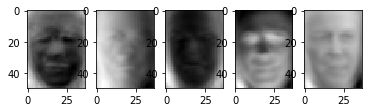

In [8]:
# plot the faces (eigenvectors)
eigenfaces = pca.components_

num = 5

# note: last 5, do eigenfaces[-num:]
images = eigenfaces[:num] # first 5 eigenvectors

fig, axes = plt.subplots(nrows=1, ncols=num) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(height, width), cmap=plt.cm.gray) 
    # reshape: 1850 -> 50, 37
    # cmap: maps to gray colour map (no green face)

plt.show()

In [9]:
print(pca.explained_variance_)

[501418.16   391795.03   183593.42   154257.28   133670.62    74828.51
  65169.824   56409.06    52337.715   49298.723   43599.19    40965.574
  31706.82    28196.87    27588.172   25390.406   23128.97    22155.65
  21659.758   18729.098   18053.51    16946.502   16575.924   14548.068
  13765.109   13481.144   13152.378   12549.607   11496.8125  10829.201
  10203.937    9893.554    9228.298    9102.338    8670.93     8551.058
   8154.3945   7677.283    7519.656    7379.365    7257.076    6934.4385
   6736.0415   6697.1636   6244.075    6194.1973   6101.1226   5768.9517
   5637.299    5612.8994   5418.4653   5324.1704   5194.4727   5116.044
   5023.6387   4892.3296   4669.669    4636.619    4530.9214   4485.164
   4293.188    4223.2305   4079.6953   3976.5225   3886.7625   3816.7104
   3730.3687   3677.2544   3620.6423   3580.4614   3473.1106   3451.4097
   3338.5095   3255.153    3220.1973   3158.4553   3134.7021   3066.1936
   2982.9097   2946.3005   2918.9883   2892.9841   2835.287  

In [10]:
print(pca.explained_variance_ratio_)

[0.19346516 0.15116861 0.07083695 0.05951801 0.05157493 0.02887153
 0.02514486 0.02176464 0.02019377 0.01902122 0.01682214 0.01580599
 0.01223363 0.01087937 0.01064451 0.00979653 0.00892399 0.00854845
 0.00835711 0.00722636 0.00696569 0.00653857 0.00639559 0.00561317
 0.00531107 0.00520151 0.00507466 0.00484209 0.00443588 0.0041783
 0.00393705 0.00381729 0.00356061 0.00351201 0.00334556 0.00329931
 0.00314626 0.00296217 0.00290135 0.00284722 0.00280004 0.00267556
 0.00259901 0.00258401 0.00240919 0.00238994 0.00235403 0.00222587
 0.00217507 0.00216566 0.00209064 0.00205426 0.00200421 0.00197395
 0.0019383  0.00188764 0.00180173 0.00178897 0.00174819 0.00173054
 0.00165647 0.00162947 0.00157409 0.00153429 0.00149965 0.00147262
 0.00143931 0.00141882 0.00139697 0.00138147 0.00134005 0.00133168
 0.00128812 0.00125596 0.00124247 0.00121865 0.00120948 0.00118305
 0.00115091 0.00113679 0.00112625 0.00111622 0.00109396 0.00107176
 0.00105667 0.00104363 0.0010239  0.00101693 0.00099774 0.00096

In [11]:
# eigenvalues-equivalent (explained_variance)
# print(pca.explained_variance_)

import numpy as np
# 95.7% of the variance is captured by projecting from 1850 to 150 features 
print(np.sum(pca.explained_variance_ratio_))

0.95669603


50 : 0.863001
100 : 0.92828345
150 : 0.9567482
200 : 0.9721656
250 : 0.9814958


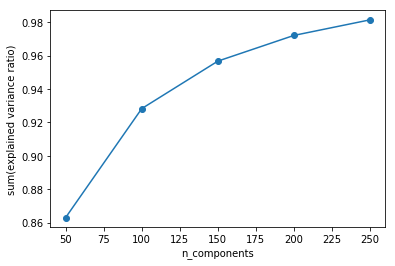

In [12]:
components = range(50, 300, 50)
evrs = []

for n in components:
    pca_temp = PCA(n_components=n)
    pca_temp.fit(X_train) # notice that PCA is unsupervised

    # compute sum of ratios (e.g. 0.95, etc)
    evr = np.sum(pca_temp.explained_variance_ratio_)
    evrs.append(evr)
    print(n, ':', evr)
    
fig, ax = plt.subplots()
ax.plot(components, evrs, marker='o')
ax.set(xlabel='n_components', ylabel='sum(explained variance ratio)')
plt.show()

In [13]:
# plot the transformed "images"
Z_train = pca.transform(X_train) # Z_train = e . X_train'
Z_test = pca.transform(X_test)

print('Train set after PCA', Z_train.shape)
print('Test set after PCA', Z_test.shape)

Train set after PCA (966, 150)
Test set after PCA (322, 150)


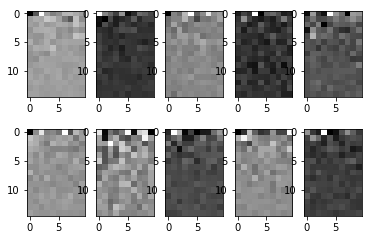

In [14]:
nrows=2
ncols=5

num = nrows * ncols
z_height = 15 # arbitrary (just for plotting)
z_width = 10

images = Z_train[:num] # first 5 transformed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols) # 5 side-by-side
axes = axes.flatten() # from (1, 5) to (5,) vector

for image, ax in zip(images, axes):
    ax.imshow(image.reshape(z_height, z_width), cmap=plt.cm.gray) 
plt.show()

Before (966, 150)
After (966, 2)


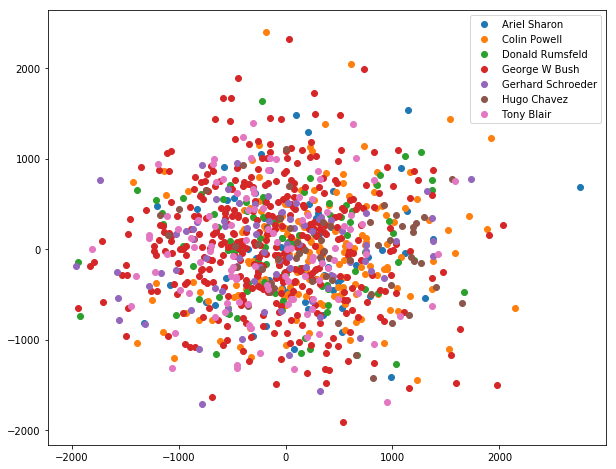

In [15]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

pca_plot = PCA(n_components=2) # Z will have 2 components

Z_train_2d = pca_plot.fit_transform(Z_train)

print('Before', Z_train.shape)
print('After', Z_train_2d.shape)

# plot
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(lfw.target_names)):
    indices = (y_train == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_train_2d[indices, 0], Z_train_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [16]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

Z_train_2d = tsne.fit_transform(Z_train)

print('Before', Z_train.shape)
print('After', Z_train_2d.shape)

Before (966, 150)
After (966, 2)


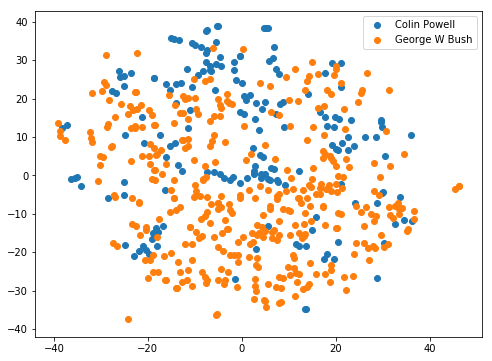

In [17]:
%matplotlib inline
# plot
fig, ax = plt.subplots(figsize=(8, 6))

# to compare any classes, just select the labels
#for i in range(len(lfw.target_names)):
for i in [1, 3]:
    indices = (y_train == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_train_2d[indices, 0], Z_train_2d[indices, 1],
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [18]:
# Visualize data using feature reduction techniques e.g. PCA, t-SNE
#
# 1. Reduce to 2d or 3d
# 2. Plot
# 3. Analyze the plot visually

from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D # <-- import 3D

tsne = TSNE(n_components=3, random_state=42) # <-- 3 components

Z_train_2d = tsne.fit_transform(Z_train)

print('Before', Z_train.shape)
print('After', Z_train_2d.shape)

Before (966, 150)
After (966, 3)


<IPython.core.display.Javascript object>


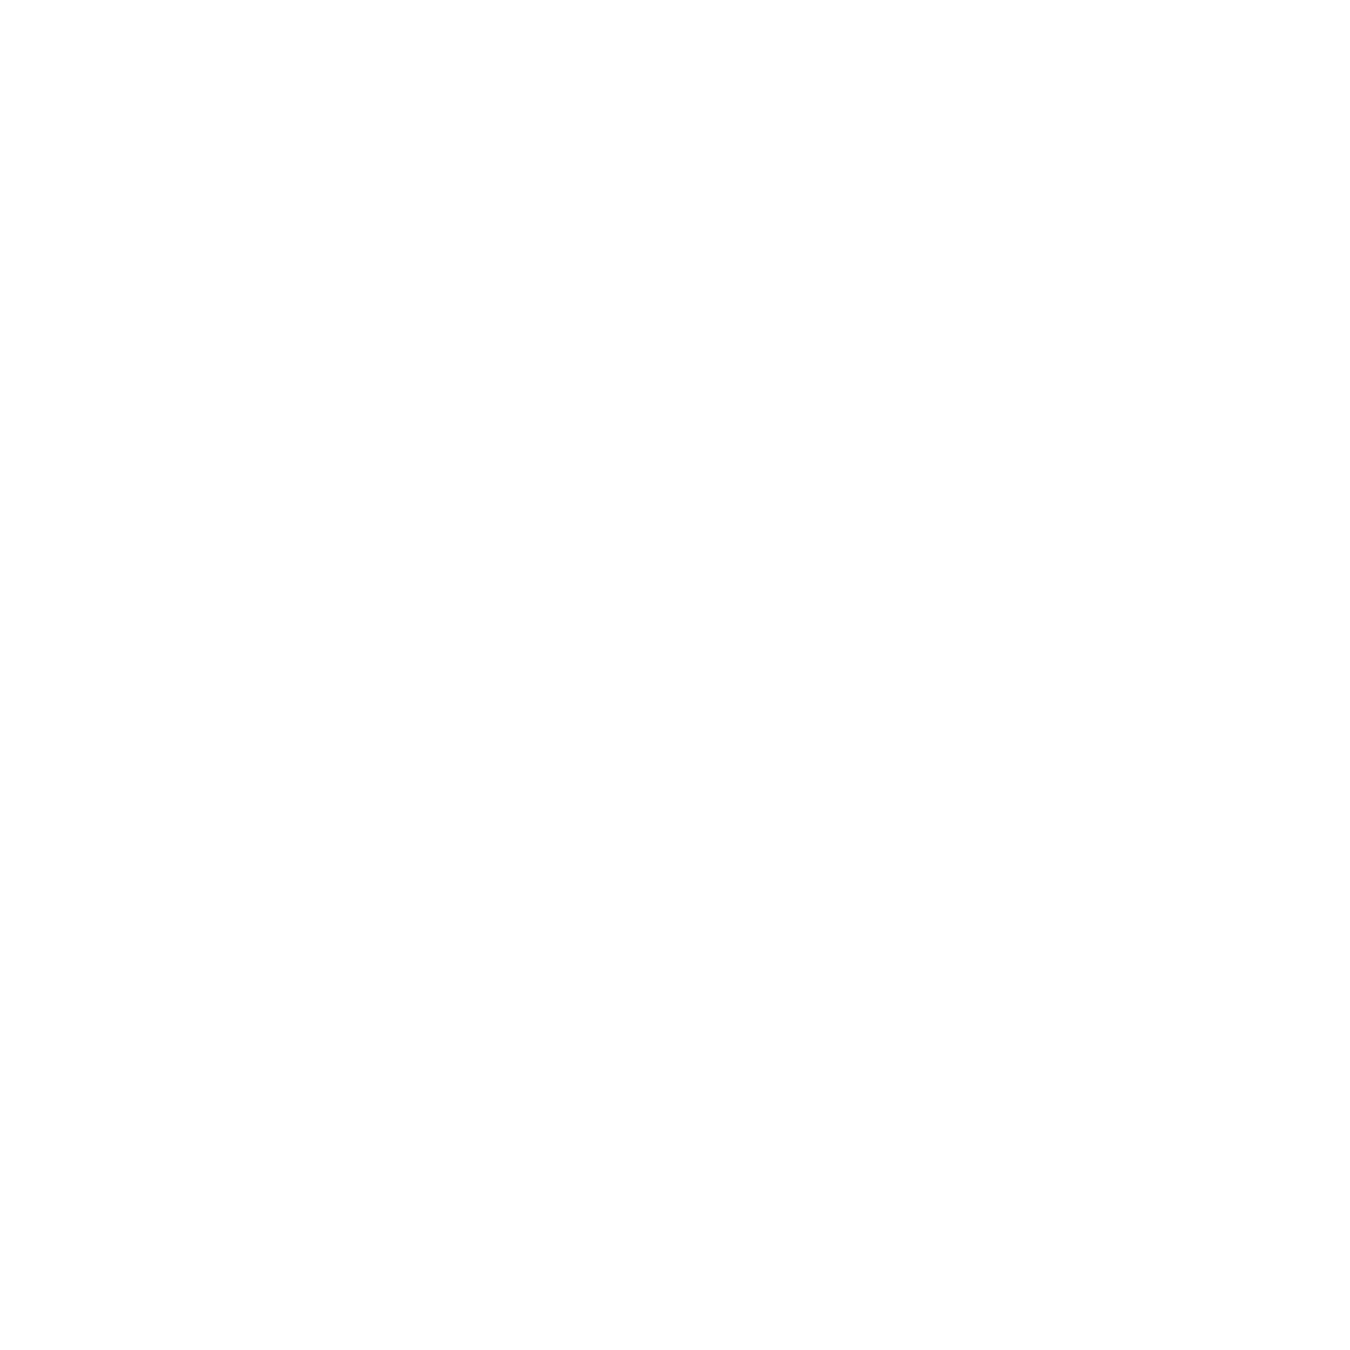

<IPython.core.display.Javascript object>


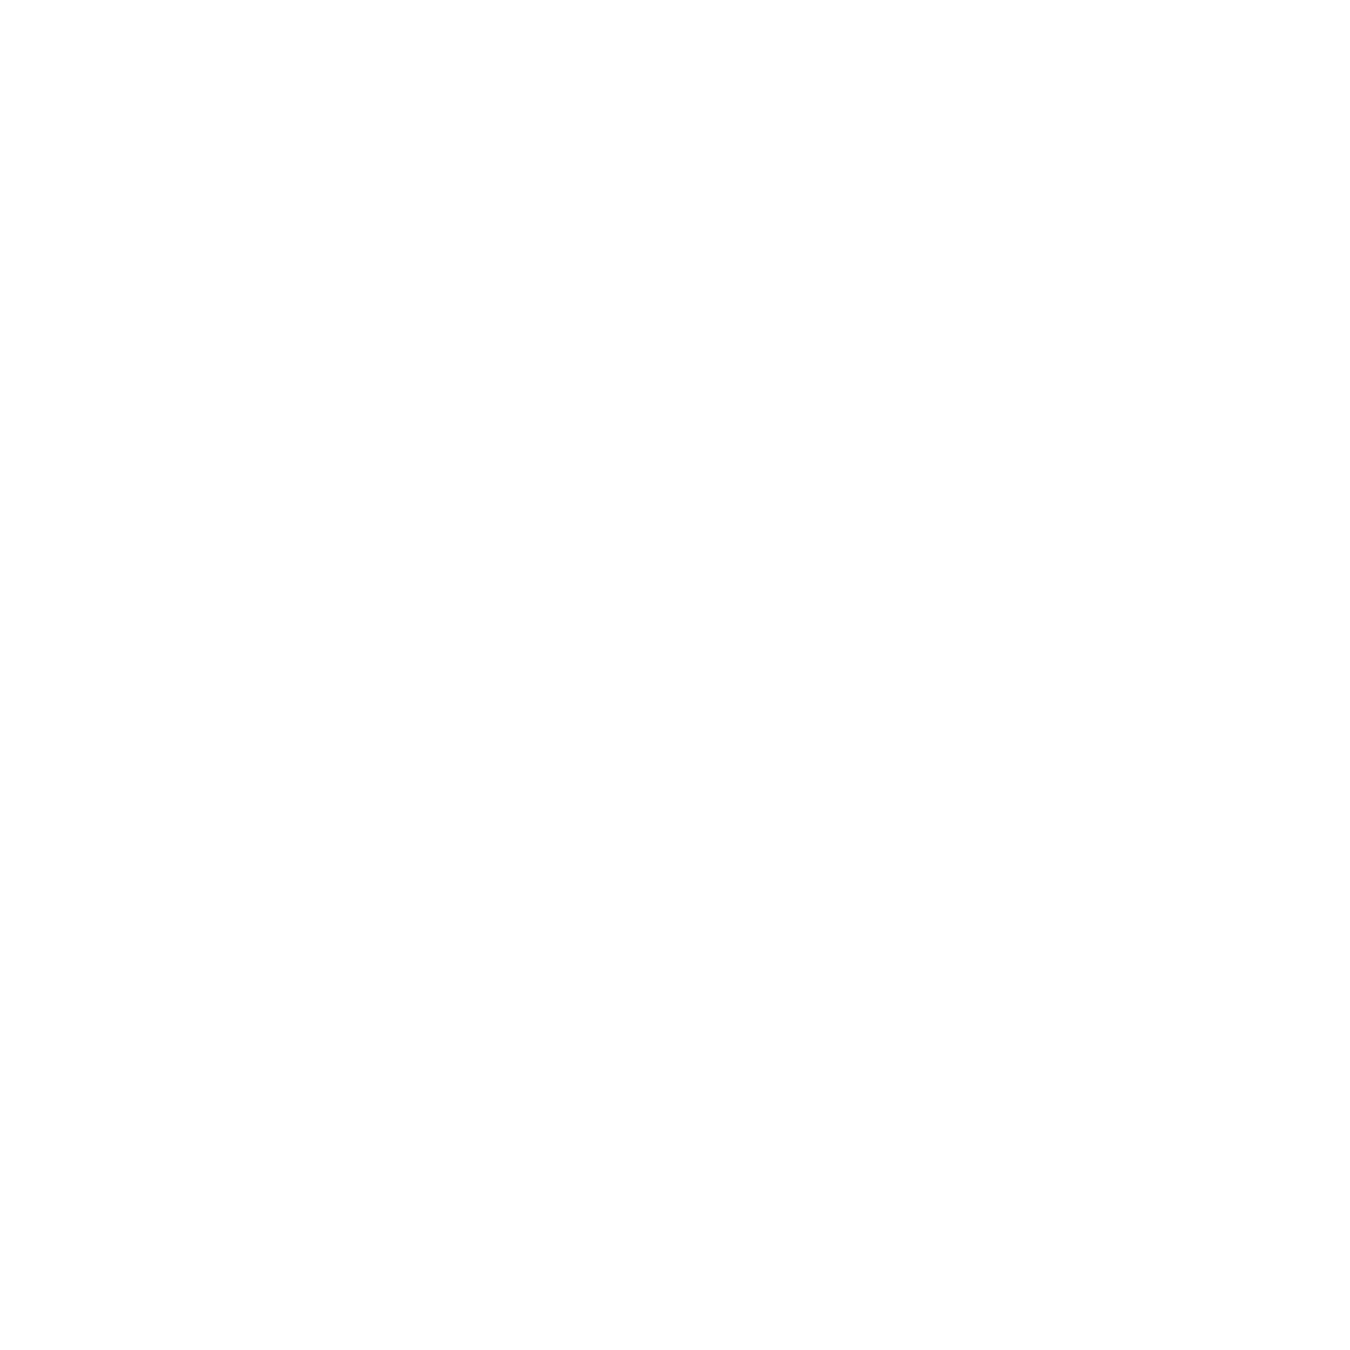

In [19]:
%matplotlib notebook

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(lfw.target_names)):
    indices = (y_train == i) # all rows with label = i

    # scatter plot rows with label = i
    ax.scatter(Z_train_2d[indices, 0], Z_train_2d[indices, 1],
               Z_train_2d[indices, 2], # <-- 3rd axis
              label=lfw.target_names[i])

ax.legend()
plt.show()

In [20]:
# Training

# 1. SGD + Logistic Regression
# 2. SVM with some non-linear kernel
# 3. Compare evaluation metrics

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train, y_train)

# using test set like validation set
scores = sgd_clf.score(Z_test, y_test)
print(scores) # accuracy

-- Epoch 1
Norm: 52737.56, NNZs: 150, Bias: -3027.782818, T: 966, Avg. loss: 3622683.490690
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 41835.42, NNZs: 150, Bias: -4815.774598, T: 1932, Avg. loss: 2294992.854604
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 32869.82, NNZs: 150, Bias: -6065.425872, T: 2898, Avg. loss: 1637734.633952
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 27411.74, NNZs: 150, Bias: -7002.322223, T: 3864, Avg. loss: 1193776.459599
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 24671.25, NNZs: 150, Bias: -7831.713257, T: 4830, Avg. loss: 1123401.059219
Total training time: 0.01 seconds.
-- Epoch 1
Norm: 57231.21, NNZs: 150, Bias: -2116.543350, T: 966, Avg. loss: 2699805.854477
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 51760.44, NNZs: 150, Bias: -3318.006791, T: 1932, Avg. loss: 1441569.017303
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 44074.53, NNZs: 150, Bias: -4138.855659, T: 2898, Avg. loss: 1080817.383867
Total trainin

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


In [22]:
from sklearn.svm import SVC

svc = SVC() # TODO: GridSearchCV is best
svc.fit(Z_train, y_train)

scores = svc.score(Z_test, y_test)
print(scores) # accuracy

0.453416149068323


In [23]:
y_pred_svc = svc.predict(Z_test)
y_pred_sgd = sgd_clf.predict(Z_test)

print('Actual (ground truth)', y_test[:10])
print('---')
print('prediction SVC', y_pred_svc[:10])
print('prediction Logistic Regression', y_pred_sgd[:10])

Actual (ground truth) [3 3 6 3 3 3 4 1 3 3]
---
prediction SVC [3 3 3 3 3 3 3 3 3 3]
prediction Logistic Regression [3 4 6 3 3 3 5 1 3 2]


In [24]:
from sklearn.metrics import confusion_matrix

print('SVC\n', confusion_matrix(y_test, y_pred_svc))

print('Logistic Regression\n', confusion_matrix(y_test, y_pred_sgd))

SVC
 [[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]
Logistic Regression
 [[ 6  3  2  2  0  0  0]
 [ 4 44  1  6  1  1  3]
 [ 3  2 14  7  1  0  0]
 [ 2 12  8 92  9 11 12]
 [ 1  1  2  5 13  1  2]
 [ 1  1  0  2  1 10  0]
 [ 1  1  1  6  3  0 24]]


Text(33,0.5,'Actual')

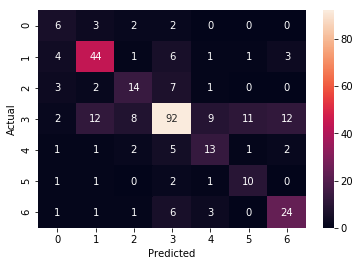

In [25]:
%matplotlib inline
import seaborn as sns

cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

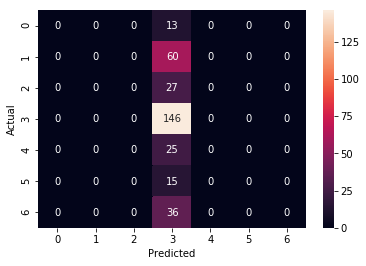

In [26]:
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d') # fmt='d' prints integers
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [27]:
# precision / recall
from sklearn.metrics import classification_report

# usage: classification_report(y_true, y_pred)
print(classification_report(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_svc))

             precision    recall  f1-score   support

          0       0.33      0.46      0.39        13
          1       0.69      0.73      0.71        60
          2       0.50      0.52      0.51        27
          3       0.77      0.63      0.69       146
          4       0.46      0.52      0.49        25
          5       0.43      0.67      0.53        15
          6       0.59      0.67      0.62        36

avg / total       0.65      0.63      0.64       322

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.00      0.00      0.00        60
          2       0.00      0.00      0.00        27
          3       0.45      1.00      0.62       146
          4       0.00      0.00      0.00        25
          5       0.00      0.00      0.00        15
          6       0.00      0.00      0.00        36

avg / total       0.21      0.45      0.28       322



C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# Improvements:
# 1. Scale
# 3. Balance the classes
# 3. Tune algorithms. SVC and Logistic Regression

In [29]:
# 1. Scale

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Z_train_scaled = scaler.fit_transform(Z_train)
Z_test_scaled = scaler.transform(Z_test)

-- Epoch 1
Norm: 411.67, NNZs: 150, Bias: -650.872246, T: 966, Avg. loss: 36.923121
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 381.28, NNZs: 150, Bias: -614.662638, T: 1932, Avg. loss: 8.191186
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 324.59, NNZs: 150, Bias: -602.389605, T: 2898, Avg. loss: 1.546905
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 301.15, NNZs: 150, Bias: -585.449184, T: 3864, Avg. loss: 1.051234
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 283.61, NNZs: 150, Bias: -569.878404, T: 4830, Avg. loss: 0.708066
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 573.71, NNZs: 150, Bias: -483.319898, T: 966, Avg. loss: 57.722656
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 508.65, NNZs: 150, Bias: -443.342782, T: 1932, Avg. loss: 15.800821
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 434.28, NNZs: 150, Bias: -438.509020, T: 2898, Avg. loss: 10.531035
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 399.91, NNZs: 150, Bias: -399

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


             precision    recall  f1-score   support

          0       0.60      0.46      0.52        13
          1       0.80      0.78      0.79        60
          2       0.68      0.70      0.69        27
          3       0.84      0.90      0.87       146
          4       0.70      0.76      0.73        25
          5       0.89      0.53      0.67        15
          6       0.79      0.72      0.75        36

avg / total       0.79      0.80      0.79       322



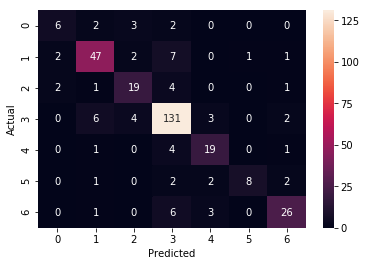

In [31]:
# fit our classifiers

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train_scaled, y_train)

scores = sgd_clf.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_sgd = sgd_clf.predict(Z_test_scaled)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_sgd))

0.8074534161490683
             precision    recall  f1-score   support

          0       1.00      0.38      0.56        13
          1       0.89      0.85      0.87        60
          2       1.00      0.48      0.65        27
          3       0.72      0.98      0.83       146
          4       1.00      0.68      0.81        25
          5       1.00      0.40      0.57        15
          6       1.00      0.69      0.82        36

avg / total       0.85      0.81      0.80       322



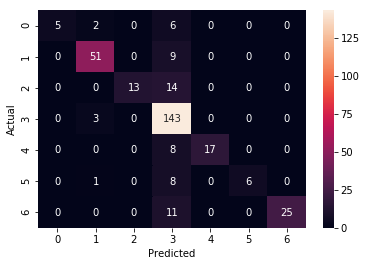

In [32]:
svc = SVC()
svc.fit(Z_train_scaled, y_train)

scores = svc.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_svc = svc.predict(Z_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_svc))

In [33]:
# 2. Balance the classes

3    384
1    176
6    108
2     94
4     84
0     64
5     56
Name: labels, dtype: int64


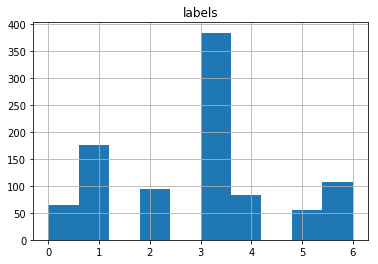

In [34]:
import pandas as pd
df_y = pd.DataFrame(y_train, columns=['labels'])
df_y.hist() # plot a histogram to see distribution

# count how many rows per label using value_counts()
print(df_y['labels'].value_counts())

In [35]:
# first, combine all training set (y, Z_train) in 1 dataframe
# this way, the values and labels are lined up
df_train = pd.concat([df_y, pd.DataFrame(Z_train)], axis=1) # concat columns

df_train.head()

,labels,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,3,-1469.752808,-654.598755,911.343994,14.467228,-276.977631,-141.525269,218.397522,249.840836,104.718124,...,35.600960,35.948174,-23.248825,-52.437294,-18.647419,-27.151119,5.267803,40.469528,1.661440,-9.896227
1,1,935.489624,371.077393,228.873810,48.178413,432.500702,-184.196411,-46.486031,252.799316,199.047699,...,1.151123,8.552829,12.542805,-30.892784,26.625645,-46.320301,0.538603,-4.197183,-20.667095,-0.954458
2,2,-539.006897,-12.349991,-102.795242,196.023621,476.894409,-153.463287,17.806932,384.974792,27.223581,...,-0.965585,-104.905365,28.449654,-11.007256,11.183842,-13.131142,-7.072261,5.717238,-24.263474,25.792305
3,6,-83.137329,72.949570,-4.180592,826.381104,-201.026382,170.536957,226.075821,117.866745,-79.157700,...,-2.282874,-34.948383,47.633015,1.608113,10.401857,-10.219389,3.641977,58.286312,-66.243729,-71.442001
4,4,-280.672729,267.177277,-107.538406,-256.001740,656.291382,251.064941,89.125305,-330.387360,268.810852,...,-24.062656,1.982967,-36.974163,-12.319653,4.438369,-45.193768,-13.160989,39.993736,0.397732,50.544273


3    100
Name: labels, dtype: int64
1    100
Name: labels, dtype: int64
6    108
2     94
4     84
0     64
5     56
Name: labels, dtype: int64
6    108
3    100
1    100
2     94
4     84
0     64
5     56
Name: labels, dtype: int64


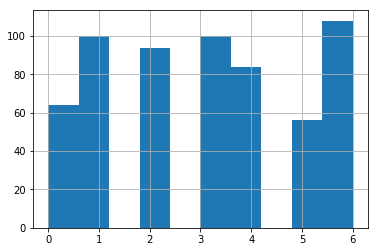

In [36]:
# next, randomly select 100 rows for labels 1 and 3
df_3 = df_train.loc[df_train['labels'] == 3].sample(n=100, random_state=42)
print(df_3['labels'].value_counts())

df_1 = df_train.loc[df_train['labels'] == 1].sample(n=100, random_state=42)
print(df_1['labels'].value_counts())

# get the remaining labels
df_others = df_train.loc[(df_train['labels'] != 3) & (df_train['labels'] != 1)]
print(df_others['labels'].value_counts())

# combine all labels into the balanced dataset
df_balanced = pd.concat([df_others, df_1, df_3])
print(df_balanced['labels'].value_counts())

# shuffle the dataset because we joined groups of the same labels together
df_balanced = df_balanced.sample(frac=1, random_state=42)
df_balanced['labels'].hist()

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


-- Epoch 1
Norm: 493.36, NNZs: 150, Bias: -612.766335, T: 606, Avg. loss: 63.381204
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 456.26, NNZs: 150, Bias: -605.341236, T: 1212, Avg. loss: 15.371446
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 427.26, NNZs: 150, Bias: -569.104013, T: 1818, Avg. loss: 4.110301
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 369.23, NNZs: 150, Bias: -562.586692, T: 2424, Avg. loss: 0.411185
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 347.65, NNZs: 150, Bias: -546.836279, T: 3030, Avg. loss: 0.839035
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 573.34, NNZs: 150, Bias: -461.169554, T: 606, Avg. loss: 59.240411
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 500.03, NNZs: 150, Bias: -475.286917, T: 1212, Avg. loss: 20.965757
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 434.47, NNZs: 150, Bias: -455.898649, T: 1818, Avg. loss: 5.748002
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 419.52, NNZs: 150, Bias: -415

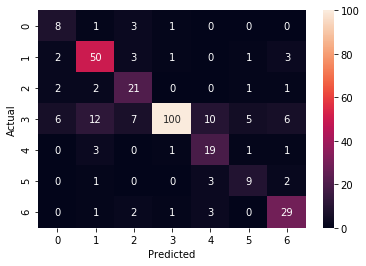

In [37]:
# fit our classifiers

Z_train_balanced = df_balanced.loc[:, df_balanced.columns != 'labels']
y_train_balanced = df_balanced['labels']

scaler = StandardScaler()
Z_train_balanced_scaled = scaler.fit_transform(Z_train_balanced)
Z_test_scaled = scaler.transform(Z_test)

sgd_clf = SGDClassifier(verbose=True, random_state=42)
sgd_clf.fit(Z_train_balanced_scaled, y_train_balanced)

scores = sgd_clf.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_sgd = sgd_clf.predict(Z_test_scaled)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)

fig, ax = plt.subplots()
sns.heatmap(cm_sgd, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_sgd))

0.8260869565217391
             precision    recall  f1-score   support

          0       0.62      0.77      0.69        13
          1       0.74      0.92      0.82        60
          2       0.83      0.74      0.78        27
          3       0.98      0.82      0.89       146
          4       0.69      0.80      0.74        25
          5       0.82      0.60      0.69        15
          6       0.71      0.89      0.79        36

avg / total       0.85      0.83      0.83       322



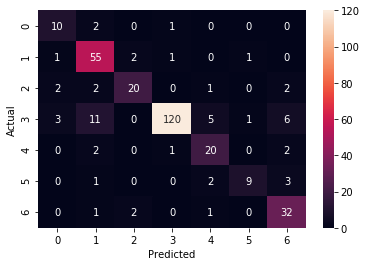

In [38]:
svc = SVC()
svc.fit(Z_train_balanced_scaled, y_train_balanced)

scores = svc.score(Z_test_scaled, y_test)
print(scores) # accuracy

y_pred_svc = svc.predict(Z_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_svc))

In [39]:
# Tune SVC hyperparameters

# http://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use
# https://cs.stanford.edu/people/karpathy/svmjs/demo/
# https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
    
from sklearn.model_selection import GridSearchCV

# SVC(C=1.0, kernel='rbf', degree=3, gamma='auto'...)

# Error penalty
# smaller = more sensitive to noise
Cs = [.001, .01, .1, 1., 10.] 

# Sensitivity: RBF(x, z) = exp(−gamma * ‖x − z‖^2)
# larger = higher tendency to overfit
gammas = [.001, .01, .1, 1, 10.]

# 3-fold cross validation
gs = GridSearchCV(SVC(probability=True), param_grid={'C': Cs, 'gamma': gammas}, verbose=True)

# try the unbalanced (but scaled) dataset
gs.fit(Z_train_scaled, y_train)

print(gs.score(Z_test_scaled, y_test))
print(gs.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.4min finished


0.8291925465838509
{'C': 10.0, 'gamma': 0.001}


             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.80      0.78      0.79        60
          2       0.78      0.67      0.72        27
          3       0.82      0.97      0.88       146
          4       1.00      0.72      0.84        25
          5       0.89      0.53      0.67        15
          6       1.00      0.78      0.88        36

avg / total       0.84      0.83      0.82       322



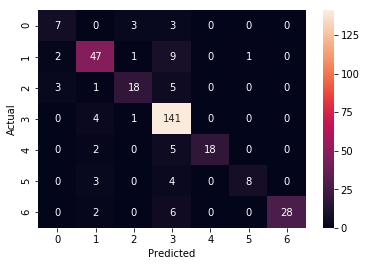

In [40]:
y_pred_svc = gs.predict(Z_test_scaled)
cm_svc = confusion_matrix(y_test, y_pred_svc)

fig, ax = plt.subplots()
sns.heatmap(cm_svc, annot=True, ax=ax, fmt='d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

print(classification_report(y_test, y_pred_svc))

In [41]:
def get_predictions(model, images):
    # PCA transform to 150 features
    Z_images = pca.transform(images)

    # scale
    Z_images_scaled = scaler.transform(Z_images)
    
    # predict
    predictions = model.predict(Z_images_scaled)    
    probs = model.predict_proba(Z_images_scaled)
    
    return predictions, probs

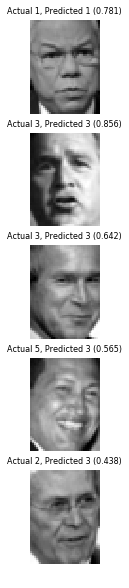

In [43]:
# Get an image to predict

test_images = X_test[-5:] # last 5 test images
test_targets = y_test[-5:]

predictions, probs = get_predictions(gs, test_images)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(5, 10))
axes = axes.flatten()

for i in range(len(test_targets)):
    axes[i].imshow(test_images[i].reshape(height, width), cmap=plt.cm.gray)

    actual = test_targets[i]
    predicted = predictions[i]
    prob = probs[i][predicted] # probability for the predicted label
    
    axes[i].set_title('Actual %s, Predicted %s (%.3f)' % (actual, predicted, prob), size=8)
    axes[i].axis('off')

plt.show()

In [ ]:
# Plot decision boundaries for the classifier
# Z_train in 2D

pca_plot = PCA(n_components=2)
pca_plot.fit(Z_train)
Z_train_2d = pca_plot.transform(Z_train)

horiz_min = Z_train_2d[:, 0].min() - 1
horiz_max = Z_train_2d[:, 1].max() + 1

vert_min = Z_train_2d[:, 1].min() - 1
vert_max = Z_train_2d[:, 1].max() + 1

# create a grid of points in the ranges
step = .1
hh, vv = np.meshgrid(np.arange(horiz_min, horiz_max, step),
                     np.arange(vert_min, vert_max, step))

grid = np.column_stack(hh.flatten(), yy.flatten())
grid
# inverse PCA transform the grid of points back into Z_train space

# Z_train_2d = pca_plot.inverse_transform(Z_train)


# scale

# predict

# plot mesh

# scatter plot training set points and predictions


# scatter plot test set points and predictions


In [44]:
Z_train_2d

array([[ 63.1309   , -47.455208 ,  47.351826 ],
       [-27.173826 ,  -8.16794  , -50.050964 ],
       [ 34.762966 ,  16.525122 , -68.12618  ],
       ...,
       [ 13.1419325,  53.44445  ,  52.201412 ],
       [-32.905773 ,  80.69122  ,  19.373327 ],
       [ 37.89746  , -17.655943 ,  35.470417 ]], dtype=float32)